In [7]:
!pip install --upgrade langchain chromadb



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import torch

# Automatically choose GPU if available, otherwise fallback to CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"Using device: {device}")


Using device: cuda


In [53]:
import pandas as pd
df=pd.read_csv("Datasets/zomato_cleaned_data.csv")
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cost2plates,category,grouped_cuisines
0,jalsa,Yes,Yes,4.1,41,Banashankari,Casual Dining,800.0,Buffet,North Indian Cuisine
1,spice elephant,Yes,No,4.1,41,Banashankari,Casual Dining,800.0,Buffet,North Indian Cuisine
2,san churro cafe,Yes,No,3.8,41,Banashankari,Others,800.0,Buffet,Western Cuisine
3,addhuri udupi bhojana,No,No,3.7,88,Banashankari,Quick Bites,300.0,Buffet,North Indian Cuisine
4,grand village,No,No,3.8,166,Basavanagudi,Casual Dining,600.0,Buffet,North Indian Cuisine


In [54]:
df=df.groupby(["name","location",'rate','votes','grouped_cuisines'])["cost2plates"].mean()

In [55]:
df

name                    location            rate  votes  grouped_cuisines            
#feeltheroll            Bellandur           3.4   7      Fast Food & Street Food         200.0
#l-81 cafe              HSR                 3.9   48     Fast Food & Street Food         400.0
#vibes restro           Electronic City     3.7   0      Asian Cuisine                   700.0
'brahmins' thatte idli  Basaveshwara Nagar  3.7   0      South Indian Cuisine            100.0
1 fahreheit             New BEL Road        3.7   0      Desserts & Beverages            200.0
                                                                                         ...  
zu's doner kebaps       Others              3.7   33     Mughlai & Hyderabadi Cuisine    350.0
zuiqa taste             Richmond Road       3.7   0      North Indian Cuisine            300.0
zyara                   HBR Layout          3.8   191    North Indian Cuisine            650.0
                                            3.9   191    No

In [46]:
df.index[0][0]

'#feeltheroll'

In [57]:
data=pd.DataFrame(columns=['name','location','rate','votes','grouped_cuisines','cost'])
for i in range(len(df)):
    data.loc[i,'name']=df.index[i][0]
    data.loc[i,'location']=df.index[i][1]
    data.loc[i,'rate']=df.index[i][2]
    data.loc[i,'votes']=df.index[i][3]
    data.loc[i,'grouped_cuisines']=df.index[i][4]
    data.loc[i,'cost']=df[i]

In [58]:
data.head()

,name,location,rate,votes,grouped_cuisines,cost
0,#feeltheroll,Bellandur,3.4,7,Fast Food & Street Food,200.0
1,#l-81 cafe,HSR,3.9,48,Fast Food & Street Food,400.0
2,#vibes restro,Electronic City,3.7,0,Asian Cuisine,700.0
3,'brahmins' thatte idli,Basaveshwara Nagar,3.7,0,South Indian Cuisine,100.0
4,1 fahreheit,New BEL Road,3.7,0,Desserts & Beverages,200.0


In [59]:
import regex as re
def clean(text):
    text=re.findall('\w+|\s+',text)
    return "".join(text)

In [60]:
data['name']=data['name'].apply(lambda x:clean(x))

In [61]:
data

,name,location,rate,votes,grouped_cuisines,cost
0,feeltheroll,Bellandur,3.4,7,Fast Food & Street Food,200.0
1,l81 cafe,HSR,3.9,48,Fast Food & Street Food,400.0
2,vibes restro,Electronic City,3.7,0,Asian Cuisine,700.0
3,brahmins thatte idli,Basaveshwara Nagar,3.7,0,South Indian Cuisine,100.0
4,1 fahreheit,New BEL Road,3.7,0,Desserts & Beverages,200.0
...,...,...,...,...,...,...
17849,zus doner kebaps,Others,3.7,33,Mughlai & Hyderabadi Cuisine,350.0
17850,zuiqa taste,Richmond Road,3.7,0,North Indian Cuisine,300.0
17851,zyara,HBR Layout,3.8,191,North Indian Cuisine,650.0
17852,zyara,HBR Layout,3.9,191,North Indian Cuisine,650.0


In [64]:
data=data[data['votes']>10]
print(len(data))
data.head()

12629


,name,location,rate,votes,grouped_cuisines,cost
1,l81 cafe,HSR,3.9,48,Fast Food & Street Food,400.0
5,1000 bc,Koramangala 5th Block,3.2,49,Fast Food & Street Food,300.0
6,100ãâãâãâãâãâãâãâãâc,BTM,3.7,41,North Indian Cuisine,450.0
7,11 to 11 express biriyanis,Electronic City,3.5,22,Mughlai & Hyderabadi Cuisine,300.0
8,1131 bar kitchen,Indiranagar,4.4,41,North Indian Cuisine,400.0


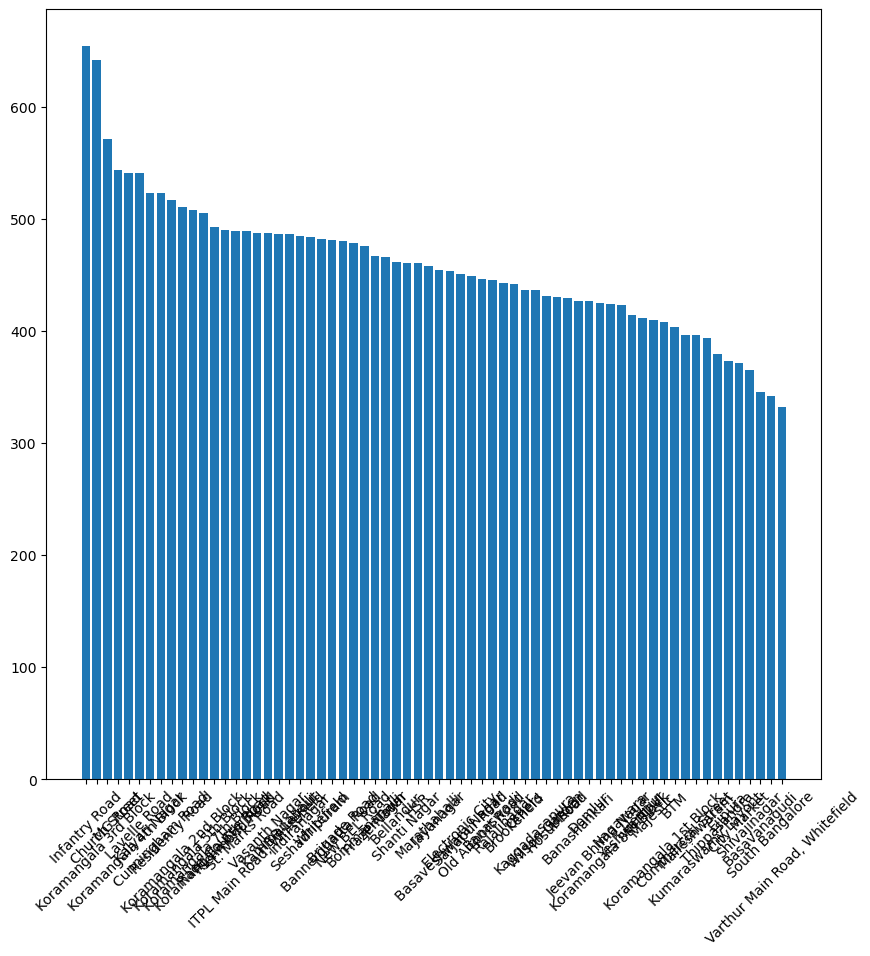

In [90]:
import matplotlib.pyplot as plt
location=data.groupby(['location'])['cost'].mean()
loc=pd.DataFrame(columns=['location','cost'])
for i in range(len(location)):
    loc.loc[i,'location']=location.index[i]
    loc.loc[i,'cost']=location[i]

    
loc=loc.sort_values(by='cost',ascending=False)

plt.figure(figsize=(10,10))
plt.bar(loc['location'],loc['cost'])
plt.xticks(rotation=45)
plt.show()

In [75]:
loc

,location,cost
24,Infantry Road,654.347826
33,Koramangala 3rd Block,641.935484
10,Church Street,571.764706
41,MG Road,544.175274
34,Koramangala 4th Block,541.37931
...,...,...
11,City Market,371.249275
56,Shivajinagar,365.384615
4,Basavanagudi,345.852804
57,South Bangalore,341.666667


In [4]:
# metadata=[i for i in metadata if i!='']
# #metadata=[i.split("\n") for i in metadata]
# metadata

In [77]:
from langchain_ollama import OllamaEmbeddings
from langchain_chroma import Chroma
from langchain_core.documents import Document
import os
import pandas as pd

In [78]:
#df = pd.read_csv("Datasets/flipkart_product.csv",encoding='ISO-8859-1')
embeddings = OllamaEmbeddings(model="llama3.2")

In [79]:
db_location = "./chrome_langchain_db"
add_documents = not os.path.exists(db_location)

In [80]:
if add_documents:
    documents = []
    ids = []
    
    for i, row in df.iterrows():
        document = Document(
            page_content=str(row["name"]) + " " + str(row["location"])+" "+str(row["rate"]),
            metadata={"price": str(row["grouped_cuisines"]), "rate": str(row["cost"])},
            id=str(i)
        )
        ids.append(str(i))
        documents.append(document)

In [12]:
# document=Document(page_content=str(" ".join(data)))
# documents=document

In [81]:
vector_store = Chroma(
    collection_name="product_reviews",
    persist_directory=db_location,
    embedding_function=embeddings
)

In [82]:
if add_documents:
    vector_store.add_documents(documents=documents, ids=ids)

In [83]:
retriever = vector_store.as_retriever(
    search_kwargs={"k": 5})

In [85]:
from langchain_ollama.llms import OllamaLLM
from langchain_core.prompts import ChatPromptTemplate
#from vector import retriever

model = OllamaLLM(model="llama3.2")

In [86]:
template = """
You are an expert in restaurants in Bangalore.
You have to give your response.

Here are some relevant reviews: {reviews}

Here is the question to answer: {question}
"""

In [87]:
prompt = ChatPromptTemplate.from_template(template)

In [88]:
chain = prompt | model

In [89]:
while True:
    print("\n\n-------------------------------")
    question = input("Ask your question (q to quit): ")
    print("\n\n")
    if question == "q":
        break
    
    reviews = retriever.invoke(question)
    result = chain.invoke({"reviews": reviews, "question": question})
    print(result)



-------------------------------
Ask your question (q to quit): what is the average cost for an Italian restaurant in Koramangala?



Koramangala! That's a popular area for dining in Bangalore. When it comes to Italian restaurants in Koramangala, I'd say the average cost can vary depending on the quality of food, service, and ambiance.

Based on my knowledge and recent reviews, here are some estimates:

* Budget-friendly options: ₹500-₹1,200 per person for a casual meal
* Mid-range Italian restaurants: ₹1,200-₹2,800 per person for a mid-range dining experience
* High-end Italian restaurants with premium ingredients: ₹3,000-₹5,500 per person for a fine dining experience

Keep in mind that these are general estimates and can vary depending on the specific restaurant and your personal preferences.

If you're looking for some specific recommendations or would like more tailored advice, feel free to ask!


-------------------------------
Ask your question (q to quit): name some italian res